# Nomor 1


## A. Handle missing values

In [97]:
import numpy as np
import pandas as pd
#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # use style fivethirtyeight
import seaborn as sns
from matplotlib import rcParams
import warnings 
warnings.filterwarnings("ignore")
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Selection
# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('E-commerce shipping data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [54]:
df.rename(columns={'Reached.on.Time_Y.N':'is_late'}, inplace=True)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Cost_of_the_Product_norm,Cost_of_the_Product_std,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,D,Flight,4,2,177,3,1,0,3.784190,...,0.378505,-0.692246,0,0,0,1,0,1,0,0
1,2,F,Flight,4,5,216,2,1,1,4.077537,...,0.560748,0.117585,0,0,0,0,1,1,0,0
2,3,A,Flight,2,2,183,4,1,1,3.871201,...,0.406542,-0.567656,1,0,0,0,0,1,0,0
3,4,B,Flight,3,3,176,4,2,1,2.302585,...,0.373832,-0.713011,0,1,0,0,0,1,0,0
4,5,C,Flight,2,2,184,3,2,0,3.828641,...,0.411215,-0.546892,0,0,1,0,0,1,0,0


In [55]:
df.isna().sum()

ID                          0
Warehouse_block             0
Mode_of_Shipment            0
Customer_care_calls         0
Customer_rating             0
Cost_of_the_Product         0
Prior_purchases             0
Product_importance          0
Gender                      0
Discount_offered            0
Weight_in_gms               0
is_late                     0
Cost_of_the_Product_norm    0
Cost_of_the_Product_std     0
Warehouse_block_A           0
Warehouse_block_B           0
Warehouse_block_C           0
Warehouse_block_D           0
Warehouse_block_F           0
Mode_of_Shipment_Flight     0
Mode_of_Shipment_Road       0
Mode_of_Shipment_Ship       0
dtype: int64

#### Dapat dipastikan bahwa data frame yang digunakan tidak memiliki nilai kosong. Sehingga tidak ada penanganan missing value pada data frame.

## B. Duplicated Data Checking

In [5]:
df.duplicated().sum()

0

In [6]:
df.duplicated(subset=['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Product_importance','Gender','Discount_offered','Reached.on.Time_Y.N']).sum()

8

In [7]:
df.duplicated(subset=['ID']).sum()

0

In [8]:
df[df.duplicated(subset=['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Product_importance','Gender','Discount_offered','Reached.on.Time_Y.N'])]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3743,3744,F,Ship,4,2,233,2,low,F,5,4817,0
6215,6216,F,Ship,6,5,255,4,low,F,9,1113,0
7569,7570,B,Ship,4,1,155,3,low,F,4,4397,0
7745,7746,F,Ship,6,4,264,4,low,M,1,1711,1
9592,9593,C,Flight,4,3,249,4,medium,M,10,5614,0
10601,10602,F,Ship,3,3,158,3,low,F,6,5261,1
10715,10716,F,Ship,5,2,254,5,medium,F,4,1926,0
10931,10932,F,Ship,4,3,253,5,low,M,6,1366,1


#### Dari hasil pengecekan duplikat data tidak ditemukan data yang duplikat pada keseluruhan kolom. Akan tetapi kami trial untuk memasukan hanya beberapa kolom kecuali kolom ID, lalu ditemukan terdapat 8 baris yang memiliki beberapa kesamaan. Namun hal tersebut tidak perlu dilakukan drop duplicated karena kesamaan hanya pada beberapa value saja. Sehingga dalam tahapan ini tidak perlu dilakukan drop duplicated data pada data frame.

## C. Handle Outliers

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
pal = sns.color_palette()
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 7
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [11]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [51]:
# memisahkan kolom numeric dan categorical
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

In [13]:
# Prior_purchases
Q1 = df['Prior_purchases'].quantile(0.25)
Q3 = df['Prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
low_limit= Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['Prior_purchases'] >= low_limit) & (df['Prior_purchases'] <= high_limit))
df = df[filtered_entries]

In [14]:
# Discount_offered
z_scores = np.abs(stats.zscore(df['Discount_offered']))
filtered_entries = (z_scores < 3)
df = df[filtered_entries]

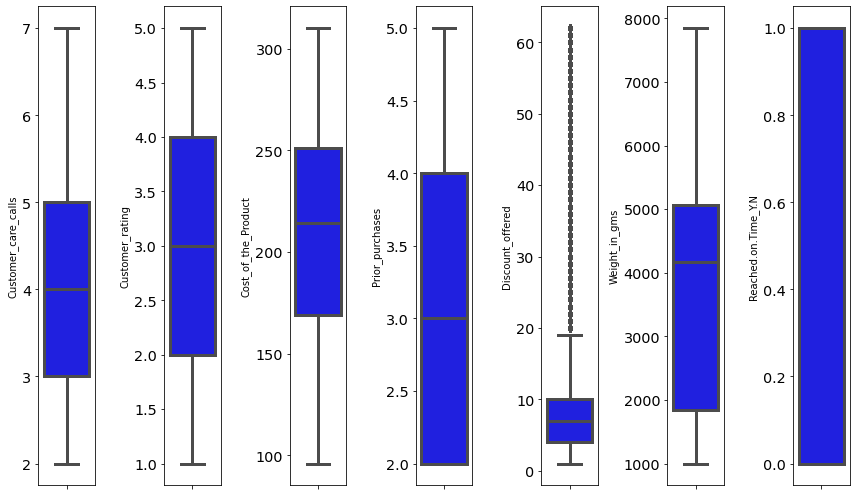

In [15]:
features = nums
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y = df[features[i]], color='blue', orient='v')
  plt.tight_layout()

Setelah dilakukan Handling Outliers, feature Prior_purchases sudah tidak ada outliers, tetapi untuk feature Discount_offered tetap terlihat outliers. Oleh karena itu, feature Discount_offered akan dilakukan log transformation agar distribusi menjadi normal.

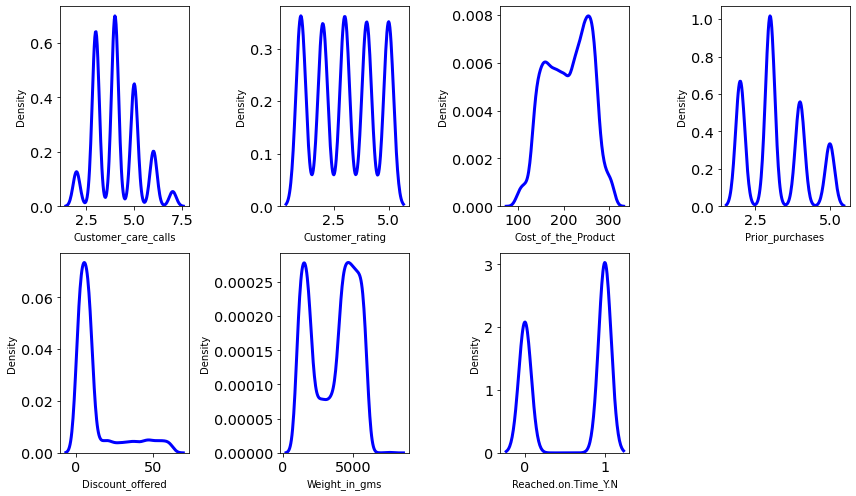

In [16]:
features = nums
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

In [17]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0


## D. Feature Transformation

#### Sebelum dilakukan Standardization

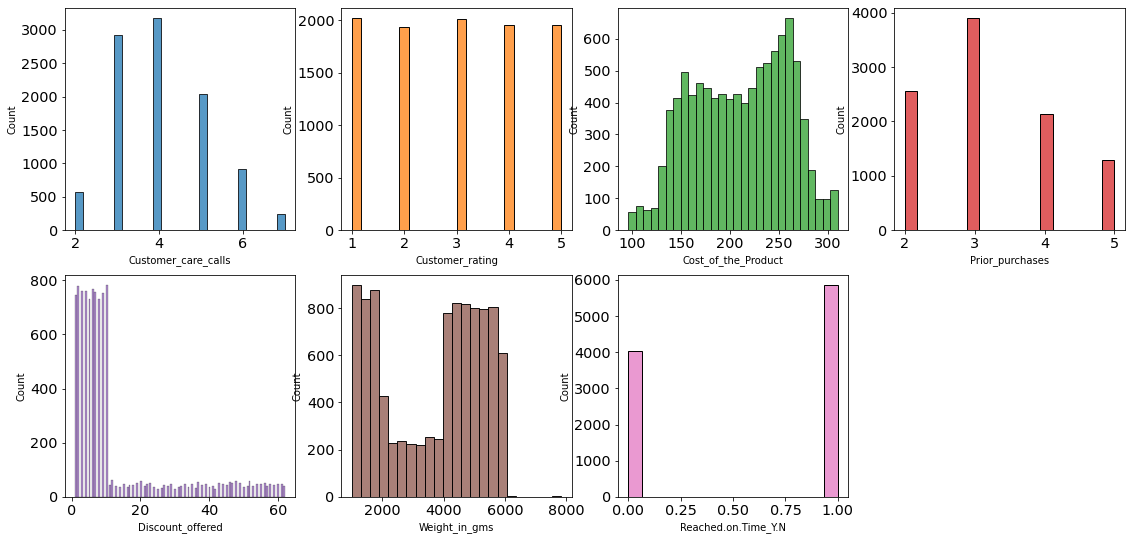

In [18]:
plt.figure(figsize = (19, 9))
for i, num in enumerate(nums):

    plt.subplot(2,4, i+1)
    sns.histplot(df[num], color=pal[i])
    
plt.show()

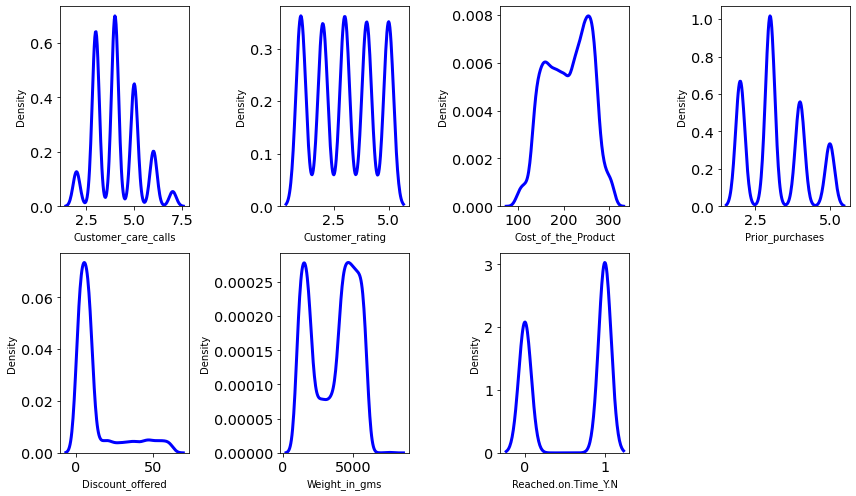

In [19]:
features = nums
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

#### Setelah dilakukan standardization

In [56]:
for col in nums:
    df[col]= StandardScaler().fit_transform(df[col].values.reshape(len(df), 1))

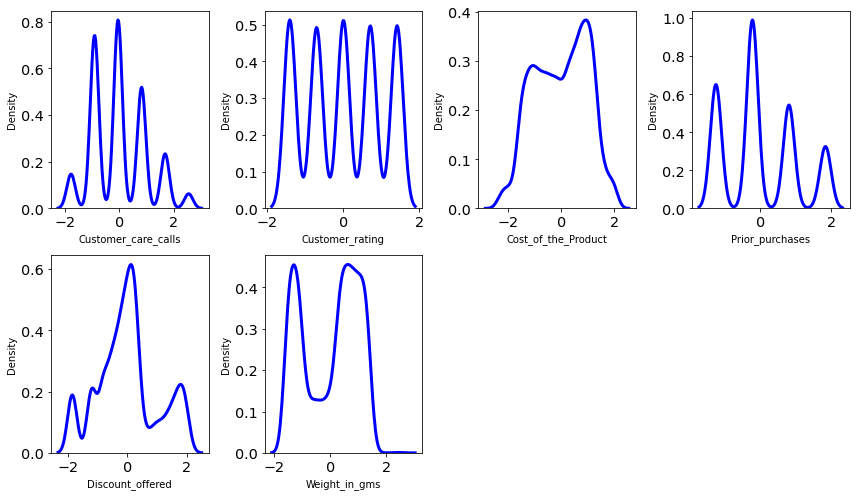

In [57]:
features = nums
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

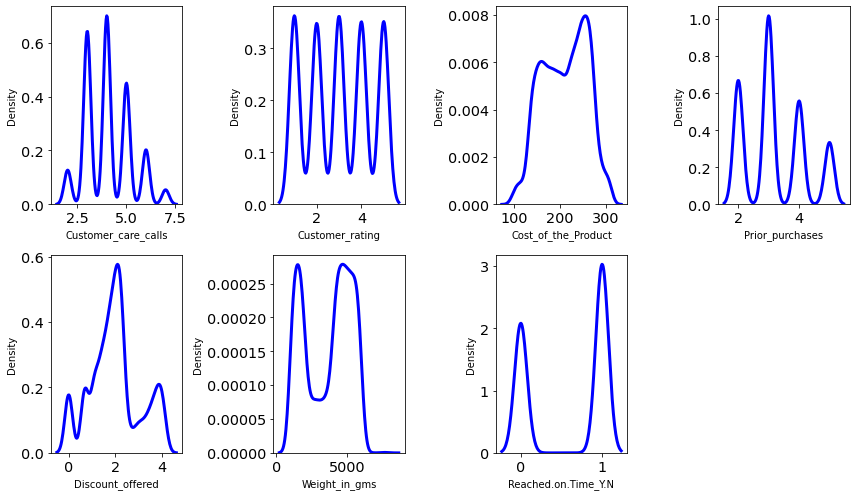

In [25]:
features = nums
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

In [58]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,is_late,Cost_of_the_Product_norm,Cost_of_the_Product_std,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
count,9878.000000,9.878000e+03,9.878000e+03,9.878000e+03,9.878000e+03,9878.000000,9878.000000,9.878000e+03,9.878000e+03,9878.00000,9878.000000,9.878000e+03,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000
mean,5513.472363,1.080169e-15,1.565192e-16,-1.360186e-16,2.206914e-15,1.344908,0.496862,-1.998222e-15,-8.000170e-17,0.59263,0.534287,-1.360186e-16,0.167645,0.166329,0.166937,0.166329,0.332760,0.163393,0.159040,0.677566
std,3165.022288,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,0.623840,0.500015,1.000051e+00,1.000051e+00,0.49137,0.225050,1.000051e+00,0.373570,0.372395,0.372938,0.372395,0.471225,0.369743,0.365732,0.467432
min,1.000000,-1.782741e+00,-1.405493e+00,-2.374202e+00,-1.249366e+00,0.000000,0.000000,-1.855242e+00,-1.620090e+00,0.00000,0.000000,-2.374202e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.250000,-9.154285e-01,-6.989196e-01,-8.583649e-01,-1.249366e+00,1.000000,0.000000,-5.544877e-01,-1.104864e+00,0.00000,0.341121,-8.583649e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5515.500000,-4.811575e-02,7.653710e-03,7.605526e-02,-2.220424e-01,1.000000,0.000000,-2.940236e-02,3.179670e-01,1.00000,0.551402,7.605526e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8260.750000,8.191970e-01,7.142271e-01,8.443563e-01,8.052807e-01,2.000000,1.000000,3.052644e-01,8.631411e-01,1.00000,0.724299,8.443563e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,10999.000000,2.553822e+00,1.420800e+00,2.069485e+00,1.832604e+00,2.000000,1.000000,2.017232e+00,2.563448e+00,1.00000,1.000000,2.069485e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## E. Feature Encoding

In [26]:
print('Warehouse_block')
print(df['Warehouse_block'].unique())
print('\n')
print('Mode_of_Shipment')
print(df['Mode_of_Shipment'].unique())
print('\n')
print('Product_importance')
print(df['Product_importance'].unique())
print('\n')
print('Gender')
print(df['Gender'].unique())

Warehouse_block
['D' 'F' 'A' 'B' 'C']


Mode_of_Shipment
['Flight' 'Ship' 'Road']


Product_importance
['low' 'medium' 'high']


Gender
['F' 'M']


In [59]:
df[nums].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,9.878000e+03,9.878000e+03,9.878000e+03,9.878000e+03,9.878000e+03,9.878000e+03
mean,1.080169e-15,1.565192e-16,-1.360186e-16,2.206914e-15,-1.998222e-15,-8.000170e-17
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.782741e+00,-1.405493e+00,-2.374202e+00,-1.249366e+00,-1.855242e+00,-1.620090e+00
25%,-9.154285e-01,-6.989196e-01,-8.583649e-01,-1.249366e+00,-5.544877e-01,-1.104864e+00
50%,-4.811575e-02,7.653710e-03,7.605526e-02,-2.220424e-01,-2.940236e-02,3.179670e-01
75%,8.191970e-01,7.142271e-01,8.443563e-01,8.052807e-01,3.052644e-01,8.631411e-01
max,2.553822e+00,1.420800e+00,2.069485e+00,1.832604e+00,2.017232e+00,2.563448e+00


In [60]:
df[cats].describe()

,Product_importance,Gender
count,9878.000000,9878.000000
mean,1.344908,0.496862
std,0.623840,0.500015
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,1.000000
max,2.000000,1.000000


In [29]:
# Label Encoding pada kolom Product_importance dan Gender
df['Product_importance'] = df['Product_importance'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes

In [30]:
# One Hot Encoding pada kolom Warehouse_block dan Mode_of_Shipment
# WARNING: run code ini sekali saja
for cat in ['Warehouse_block','Mode_of_Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [61]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Cost_of_the_Product_norm,Cost_of_the_Product_std,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,D,Flight,-0.048116,-0.698920,-0.692246,-0.222042,1,0,1.695448,...,0.378505,-0.692246,0,0,0,1,0,1,0,0
1,2,F,Flight,-0.048116,1.420800,0.117585,-1.249366,1,1,1.970695,...,0.560748,0.117585,0,0,0,0,1,1,0,0
2,3,A,Flight,-1.782741,-0.698920,-0.567656,0.805281,1,1,1.777091,...,0.406542,-0.567656,1,0,0,0,0,1,0,0
3,4,B,Flight,-0.915428,0.007654,-0.713011,0.805281,2,1,0.305264,...,0.373832,-0.713011,0,1,0,0,0,1,0,0
4,5,C,Flight,-1.782741,-0.698920,-0.546892,-0.222042,2,0,1.737157,...,0.411215,-0.546892,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,0.819197,-1.405493,0.532883,1.832604,2,1,-0.824419,...,0.654206,0.532883,0,0,0,1,0,0,0,1
10994,10995,A,Ship,-0.048116,-1.405493,0.865121,1.832604,2,0,-1.855242,...,0.728972,0.865121,1,0,0,0,0,0,0,1
10995,10996,B,Ship,-0.048116,-1.405493,0.449823,1.832604,2,0,-0.174041,...,0.635514,0.449823,0,1,0,0,0,0,0,1
10996,10997,C,Ship,0.819197,0.714227,0.657472,1.832604,1,0,-0.554488,...,0.682243,0.657472,0,0,1,0,0,0,0,1


In [62]:
# drop kolom Warehouse_block dan Mode_of_Shipment yang asli (karena sudah di-encoding)
df_new = df.drop(columns=['Warehouse_block','Mode_of_Shipment']).copy()

In [63]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9878 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        9878 non-null   int64  
 1   Customer_care_calls       9878 non-null   float64
 2   Customer_rating           9878 non-null   float64
 3   Cost_of_the_Product       9878 non-null   float64
 4   Prior_purchases           9878 non-null   float64
 5   Product_importance        9878 non-null   int8   
 6   Gender                    9878 non-null   int8   
 7   Discount_offered          9878 non-null   float64
 8   Weight_in_gms             9878 non-null   float64
 9   is_late                   9878 non-null   int64  
 10  Cost_of_the_Product_norm  9878 non-null   float64
 11  Cost_of_the_Product_std   9878 non-null   float64
 12  Warehouse_block_A         9878 non-null   uint8  
 13  Warehouse_block_B         9878 non-null   uint8  
 14  Warehou

## F. Class Imbalance

In [34]:
!pip install imblearn

In [64]:
#Cek ratio jumlah nilai target

df_ROD=df_new.groupby('is_late').agg({'ID':'count'}).reset_index().rename(columns={'ID':'Jumlah'})
df_ROD['Ratio']=df_ROD['Jumlah']*100/df_ROD['Jumlah'].sum()
df_ROD

,is_late,Jumlah,Ratio
0,0,4024,40.736991
1,1,5854,59.263009


##### The ratio of the target looks balance.

# Nomor 2

## A. Feature Selection Menggunakan Pearson

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
corr_pearson = df_new.drop(columns=['ID','Cost_of_the_Product_std','Cost_of_the_Product_norm','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F','Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship']).corr()

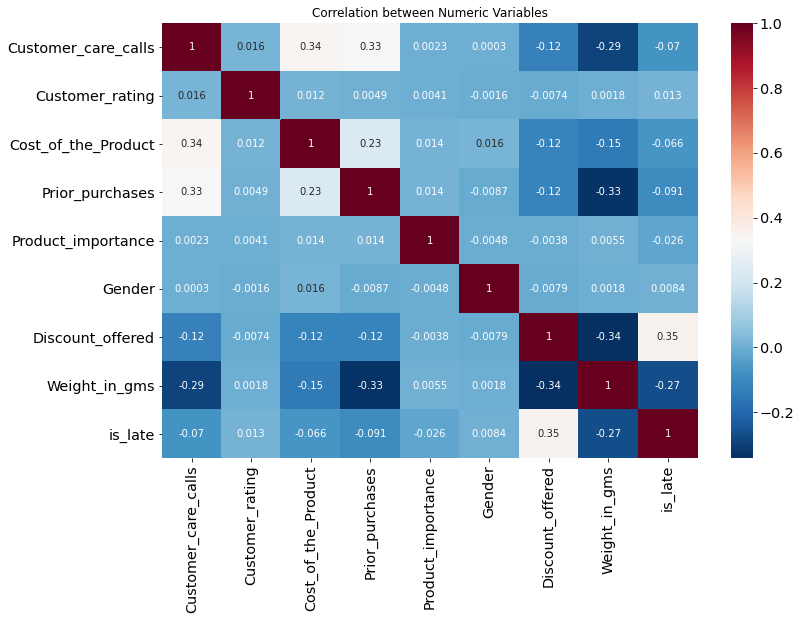

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

Karena Feature Selection ini menggunakan Pearson. Maka Negatif pun bisa dijadikan patokan untuk korelasi.

#### Summary
*   ID sebenarnya berkorelasi dengan yang lain, namun ID sebaiknya di "dont care" kan, karena ID termasuk kedalam data yang terurut
*   Target dari dataset ini adalah melihat kolom Reached On Time
*   Korelasi tertinggi pada sisi target dimiliki oleh Discount Offered dengan nilai 0.35
*   Korelasi kolom lain dengan target adalah dengan Weight dengan nilai -0.27 (meskipun minus, di pearson tetap terkorelasi)
*  Fitur lain selain target yang berkorelasi dan termasuk kedalam fitur yang penting adalah Prior Purchase, Customer Care Calls, Cost of Product, Discount Offered, Weight in gms
*  Feature atau kolom yang dihapus adalah Customer Rating (rendah korelasi nya) sesuai dengan hasil korelasi pearson
*  **Hasil Feature Selection** adalah Reached on time, Prior Purchase, Customer Care Calls, Cost of Product, Discount Offered, Weight in gms.









#### Requirements
* Menggunakan Feature Selection Pearson
* Tidak ada kolom yang dihapus untuk test, karena pearson menggunakan numerical
* Feature atau kolom yang dihapus adalah Customer Rating (rendah korelasi nya) sesuai dengan hasil korelasi pearson

# Stage 3

In [73]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9878 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        9878 non-null   int64  
 1   Customer_care_calls       9878 non-null   float64
 2   Customer_rating           9878 non-null   float64
 3   Cost_of_the_Product       9878 non-null   float64
 4   Prior_purchases           9878 non-null   float64
 5   Product_importance        9878 non-null   int8   
 6   Gender                    9878 non-null   int8   
 7   Discount_offered          9878 non-null   float64
 8   Weight_in_gms             9878 non-null   float64
 9   is_late                   9878 non-null   int64  
 10  Cost_of_the_Product_norm  9878 non-null   float64
 11  Cost_of_the_Product_std   9878 non-null   float64
 12  Warehouse_block_A         9878 non-null   uint8  
 13  Warehouse_block_B         9878 non-null   uint8  
 14  Warehou

### Separate feature & target column

In [81]:
x = df_new.drop(columns=['ID','is_late'])
y = df_new['is_late']

### Split train & test data

In [82]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [89]:
df_new.shape

(9878, 20)

In [90]:
xtrain.shape

(6914, 18)

In [91]:
xtest.shape

(2964, 18)

In [92]:
ytrain.shape

(6914,)

In [93]:
ytest.shape

(2964,)

### Fit & Evaluation Model

In [95]:
# Create function to fit model & model evaluation
def fit_evaluation(Model, xtrain, ytrain, xtest, ytest):
    model = Model # initiate model
    model.fit(xtrain, ytrain) # fit the model
    y_pred = model.predict(xtest)
    y_pred_train = model.predict(xtrain)
    train_score = model.score(xtrain, ytrain) # Train Accuracy
    test_score = model.score(xtest, ytest)    # Test Accuracy
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr) # AUC
    return round(train_score,2), round(test_score,2), round(precision_score(ytest, y_pred),2), \
           round(recall_score(ytrain, y_pred_train),2),round(recall_score(ytest, y_pred),2), \
           round(f1_score(ytest, y_pred),2), round(AUC,2)

In [98]:
#Inisiasi algoritma
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

## Membuat function untuk menjadikan hasilnya sebagai Data Frame

In [116]:
def model_comparison_default(x,y):
    #Logistic Regression
    lr_train_score, lr_test_score, lr_pr, lrtr_re, lrte_re, lr_f1, lr_auc = fit_evaluation(lr, xtrain, ytrain, xtest, ytest)
    #Decision Tree
    dt_train_score, dt_test_score, dt_pr, dttr_re, dtte_re, dt_f1, dt_auc = fit_evaluation(dt, xtrain, ytrain, xtest, ytest)
    #Random Forest
    rf_train_score, rf_test_score, rf_pr, rftr_re, rfte_re, rf_f1, rf_auc = fit_evaluation(rf, xtrain, ytrain, xtest, ytest)
    #KNN
    knn_train_score, knn_test_score, knn_pr, knntr_re, knnte_re, knn_f1, knn_auc = fit_evaluation(knn, xtrain, ytrain, xtest, ytest)
    
    models = ['Logistic Regression','Decision Tree','Random Forest','KNN']
    train_score = [lr_train_score, dt_train_score, rf_train_score, knn_train_score]
    test_score = [lr_test_score, dt_test_score, rf_test_score, knn_test_score]
    precision = [lr_pr, dt_pr, rf_pr, knn_pr]
    recall_train = [lrtr_re, dttr_re, rftr_re, knntr_re]
    recall_test = [lrte_re, dtte_re, rfte_re, knnte_re]
    f1 = [lr_f1, dt_f1, rf_f1, knn_f1]
    auc = [lr_auc, dt_auc, rf_auc, knn_auc]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, 
                                          precision, recall_train, recall_test,
                                          f1,auc]).T.rename({0: 'Model',
                                                             1: 'Accuracy_Train',
                                                             2: 'Accuracy_Test',
                                                             3: 'Precision',
                                                             4: 'Recall_Train',
                                                             5: 'Recall_Test',
                                                             6: 'F1 Score',
                                                             7: 'AUC'
                                            }, axis=1)
    
    return model_comparison

In [117]:
model_comparison_default(x,y)

,Model,Accuracy_Train,Accuracy_Test,Precision,Recall_Train,Recall_Test,F1 Score,AUC
0,Logistic Regression,0.63,0.64,0.69,0.73,0.73,0.71,0.62
1,Decision Tree,1,0.65,0.7,1,0.72,0.71,0.64
2,Random Forest,1,0.66,0.76,1,0.63,0.69,0.67
3,KNN,0.76,0.64,0.71,0.77,0.67,0.69,0.64


## Hyperparameter

### Logistic Regression

In [118]:
# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42,  scoring='recall')

# Fitting Model & Evaluation
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
model.best_estimator_

LogisticRegression(C=0.0001, random_state=42)

### Decision Tree

In [120]:
# Let's do hyperparameter tuning using RandomizesearchCV

# Hyperparameter lists to be tested
max_depth = list(range(1,10)) 
min_samples_split = list(range(5,10)) 
min_samples_leaf = list(range(5,15)) 
max_features = ['auto', 'sqrt', 'log2'] 
criterion = ['gini','entropy']
splitter = ['best','random']

# Initiate hyperparameters
hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion = criterion,
                       splitter = splitter)

# Initiate model
dt_tun = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt_tun, hyperparameters, cv=10, scoring='recall',random_state=42) 
model.fit(xtrain, ytrain)
y_pred_tun = model.predict(xtest)
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='auto',
                       min_samples_leaf=14, min_samples_split=5,
                       random_state=42, splitter='random')

### Random Forest

In [121]:
# Initiate hyperparameters
params = {'max_depth':[50],'n_estimators':[100,150], 
          'criterion':['gini', 'entropy']}
# Initiate model
model = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                     param_grid=params,scoring='recall', cv=5)
# Fit model
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
# Get best estimator
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50, random_state=42)

### KNN

In [123]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
KNN_2 = KNeighborsClassifier()

#Use RandomizedSearchCV
clf = RandomizedSearchCV(KNN_2, hyperparameters, cv=10, scoring = 'recall')

#Fit the model
best_model = clf.fit(x,y)
# Get best estimator
clf.best_estimator_

KNeighborsClassifier(leaf_size=16, n_neighbors=1, p=1)

## Tuned Parameter

In [134]:
# Inititate best estimator
lr_tune = LogisticRegression(C=0.0001, random_state=42)
dt_tune = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=6,
                       random_state=42)
rf_tune = RandomForestClassifier(max_depth=50, random_state=42)
knn_tune = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Create function to make the result as dataframe 
def model_comparison_tuned(x,y):  
    
    # Logistic Regression
    lr_train_score, lr_test_score, lr_pr, lrtr_re, lrte_re, lr_f1, lr_auc = fit_evaluation(
        lr_tune, xtrain, ytrain, xtest, ytest)
    # Decision Tree
    dt_train_score, dt_test_score, dt_pr, dttr_re, dtte_re, dt_f1, dt_auc = fit_evaluation(
        dt_tune, xtrain, ytrain, xtest, ytest)
    # Random Forest
    rf_train_score, rf_test_score, rf_pr, rftr_re, rfte_re, rf_f1, rf_auc = fit_evaluation(
        rf_tune, xtrain, ytrain, xtest, ytest)
    # KNN
    knn_train_score, knn_test_score, knn_pr, knntr_re, knnte_re, knn_f1, knn_auc = fit_evaluation(
        knn_tune, xtrain, ytrain, xtest, ytest)
    
    models = ['Logistic Regression','Decision Tree','Random Forest','KNN']
    train_score = [lr_train_score, dt_train_score, rf_train_score,knn_train_score]
    test_score = [lr_test_score, dt_test_score, rf_test_score, knn_test_score]
    precision = [lr_pr, dt_pr, rf_pr, knn_pr]
    recall_train = [lrtr_re, dttr_re, rftr_re, knntr_re]
    recall_test = [lrte_re, dtte_re, rfte_re, knnte_re]
    f1 = [lr_f1, dt_f1, rf_f1, knn_f1]
    auc = [lr_auc, dt_auc, rf_auc, knn_auc]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, 
                                          precision, recall_train, recall_test,
                                          f1,auc]).T.rename({0: 'Model',
                                                             1: 'Accuracy_Train',
                                                             2: 'Accuracy_Test',
                                                             3: 'Precision',
                                                             4: 'Recall_Train',
                                                             5: 'Recall_Test',
                                                             6: 'F1 Score',
                                                             7: 'AUC'
                                                                                  }, axis=1)
    
    return model_comparison

In [135]:
model_comparison_tuned(x,y)

,Model,Accuracy_Train,Accuracy_Test,Precision,Recall_Train,Recall_Test,F1 Score,AUC
0,Logistic Regression,0.59,0.59,0.59,1,1,0.75,0.5
1,Decision Tree,0.68,0.69,0.96,0.48,0.49,0.65,0.73
2,Random Forest,1,0.66,0.76,1,0.63,0.69,0.67
3,KNN,1,0.63,0.69,1,0.7,0.69,0.62


Algoritma Decision Tree dengan hyperparameter tuning memiliki keseimbangan yang baik antara skornya, juga tidak underfitting maupun overfitting.

# Feature Importance

In [158]:
def show_feature_importance_dt(model):
    feat_importances = pd.Series(dt_tune.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

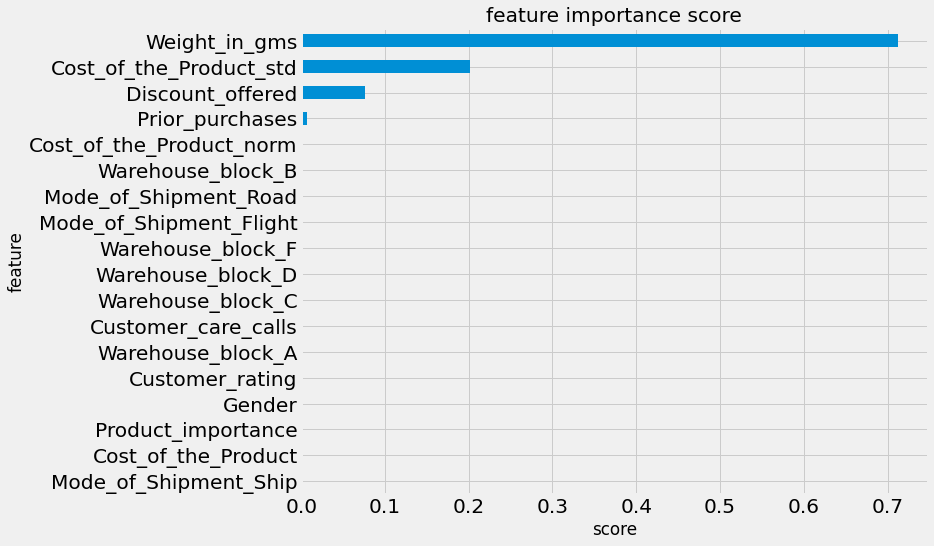

In [159]:
show_feature_importance_dt(model.best_estimator_)

### Top 3 Feature Importance yang dapat diambil adalah:
1. Berat barang (Weight_in_gms)
2. Harga produk (Cost_of_the_Product_std)
3. Diskon yang diberikan (Discount_offered)

### Business Insight:
Untuk feature importance yang paling mempengaruhi keterlambatan pengiriman barang terletak pada fitur 'Berat Produk'. Dapat dilihat pada proses data preprocessing yang sudah dilaukan, terlihat bahwa nilai korelasi antara feature 'Berat Produk' dengan target 'Keterlambatan' memiliki nilai korelasi negatif. Jadi dapat disimpulkan bahwa berat produk mempengaruhi proses pengiriman, semakin berat suatu produk, maka semakin berpotensi mengalami keterlambatan pengiriman.

### Action Items

##### Short terms:
Tambahkan feature perkiraan waktu kedatangan untuk memastikan paket tiba tepat waktu
##### Long terms:
Tambahkan lebih banyak featur untuk memberikan insight yang lebih spesifik dan akurat